# KNN Experiment with sklearn

student: Isabelle Melo

In this experiment I am gonna apply a KNN algorithm to a supervised problem using sklearn functions. We want to predict if a test point belongs to a class or another (2 class problem). To do this, we're synthetically generating data from 2 gaussian classes:

$N(x, -1, 1)$ and $N(x, +1, 1)$

Each class produces 20 random points and that'll be our training set. From the same 2 classes, let's generate 4 additional points: 2 from $C_{1}$ and 2 from $C_{2}$ and pretending we don't know which class generated each test point. We would like to classify these 4 by KNN. So, how does KNN works?
KNN is a machine learning algorithm, very simple but also very powerful.
For a test point generated, having a traing set defined, you first calculate its distance from all training points. Having the distances, you choose $k$ parameter, that is, the number of closest neighbors. If we choose $k=3$, we want the distances of the 3 closest neighbors! 
Sorting these 3 distances, the last one (the biggest) can be defined to be a ratio of a circle centered in your test point. This circle will englobe exactly the 3 neighbors! Since they are training points, and we know which class they belong to, inside the circle drawn we can count the number of neighbors from each class. The "winner" is the one that has more countings inside it. Let's suppose we have more $C_{1}$ points inside the circle than $C_{2}$. Then our test point will be classified as $C_{1}$. Is it clear? So let's get down to business.

## Importing bibs

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as ss
import math
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

## Gaussian functions

In [4]:
def gauss1(x):
    gauss = np.exp(-np.power(x + 1, 2.) / (2 * np.power(1, 2.))) 
    
    return gauss


def gauss2(x):
    gauss = np.exp(-np.power(x - 1, 2.) / (2 * np.power(1, 2.))) 
    
    return gauss

## KNN function

This KNN function collects your training set, your target, and the value you want to predict. It returns the result of classification in terms of choosen $k$.

In [5]:
def knn(k,train, target, test):
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(train,target)
    print(f'The prediction found for the point {test} of k={k} was class {knn.predict(test)}')
                   
    print(f'The probability estimates for each class are {knn.predict_proba(test)}')

## Experiment

We define our 2 training sets from random samples and then concatenate them, and then match'em with their corresponding classes. Also, Y values for gaussians are calculated and concateneted.

In [6]:
treino_1 = np.random.randn(20)
treino_2 = np.random.randn(20)

treino = np.concatenate((treino_1,treino_2))

classe1 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
classe2 = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

Y_train = np.concatenate((classe1,classe2))

gauss_1 = gauss1(treino_1)
gauss_2 = gauss2(treino_2)

gauss = np.concatenate((gauss_1,gauss_2))

Don't forget training set is consisted of X axis and Y axis (they are - of course - correlated!). It'd be easier to see if we set a pandas dataframe. Just think about X and Y axis as columns, and for each x-value, there is a corresponding y-value in a row, and a corresponding class (where it came from).

In [7]:
X_train = [[treino[i],gauss[i]] for i in range(len(gauss))]

Before we perform the experiment, let's check the distribuitions from our classes.

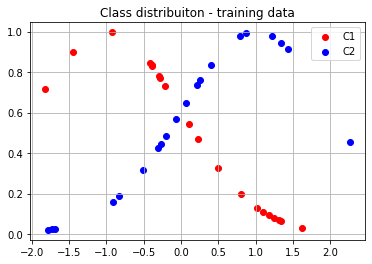

In [8]:
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.legend(["C1" , "C2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

As expected, we have two gaussians! 

Now let's generate test points the same way we generated training points. We just pretend now we don't know where they came from and want to find out with machine learning.

In [9]:
teste1_x = float(np.random.randn(1))
teste2_x = float(np.random.randn(1))
teste3_x = float(np.random.randn(1))
teste4_x = float(np.random.randn(1))

list_x = [teste1_x,teste2_x,teste3_x,teste4_x]

teste1_y = float(gauss1(teste1_x))
teste2_y = float(gauss1(teste2_x))
teste3_y = float(gauss2(teste3_x))
teste4_y = float(gauss2(teste4_x))

list_y = [teste1_y, teste2_y, teste3_y, teste4_y]

TESTE = []

for i in range(len(list_x)):
    TESTE.append([list_x[i],list_y[i]])
    

TESTE = np.array(TESTE)

print(TESTE)

TESTE = [TESTE]

[[-1.84241465  0.70129179]
 [ 1.29844046  0.07126042]
 [ 0.08963386  0.66074767]
 [ 0.90218459  0.9952275 ]]


Test set, then, is generated above. We could automate this code but let's try it by hand just to see better how it works. First I'll try $k=3$ and then $k=10$. 
If the class predicted is correct, I plot it as a black square, otherwise, I plot as a $x$.

The prediction found for the point [[-1.84241465, 0.70129179]] of k=3 was class [1]
The probability estimates for each class are [[0.33333333 0.66666667]]


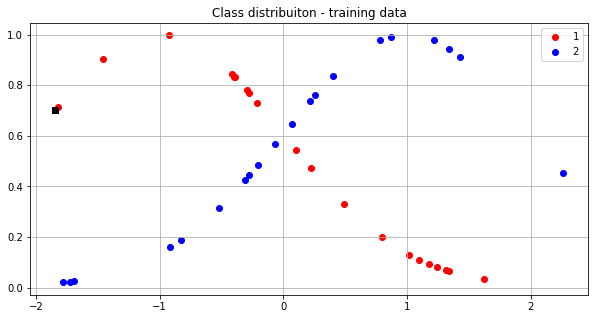

In [10]:
knn(3,X_train, Y_train,[[-1.84241465 , 0.70129179]] )



plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(-1.84241465 , 0.70129179, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

We got it right! First one is correctly predicted. Let's try the second one.

The prediction found for the point [[1.29844046, 0.07126042]] of k=3 was class [1]
The probability estimates for each class are [[0. 1.]]


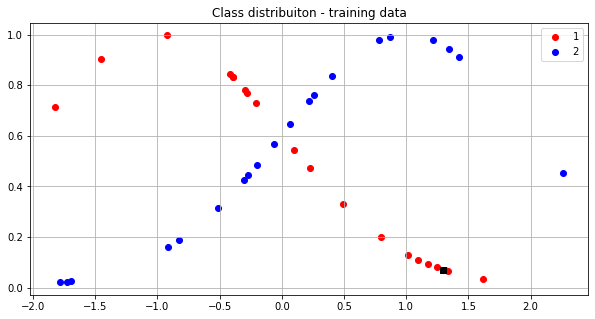

In [12]:
knn(3,X_train, Y_train,[[ 1.29844046 , 0.07126042]] )


plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter( 1.29844046 , 0.07126042, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

Again, KNN got the right answer =)

The prediction found for the point [[0.08963386, 0.66074767]] of k=3 was class [0]
The probability estimates for each class are [[0.66666667 0.33333333]]


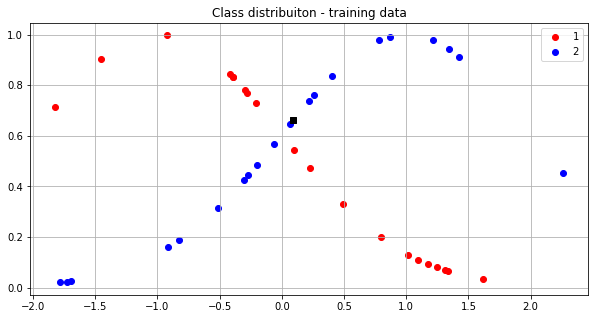

In [14]:
knn(3,X_train, Y_train,[[0.08963386 , 0.66074767]] )

plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(0.08963386 , 0.66074767, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

Great, class 0 is the same as class $C_{2}$ blue, and KNN got it right

The prediction found for the point [[0.90218459, 0.9952275]] of k=3 was class [0]
The probability estimates for each class are [[1. 0.]]


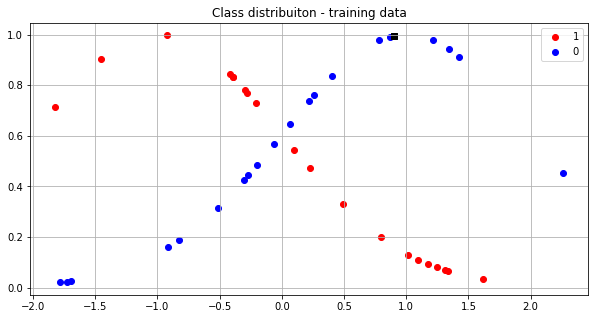

In [16]:
knn(3,X_train, Y_train,[[0.90218459 , 0.9952275 ]] )


plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(0.90218459 , 0.9952275 , color = 'black', marker = 's')
plt.legend(["1" , "0"])
plt.title('Class distribuiton - training data')
plt.grid(True)

KNN hasn't made any mistake for $k=3$! It was expected we'd get great predictions just by looking at the distribuitions. There's not a big intersection between them and mistakes may occur when a test point falls just between the gaussians.

What if we set $k=10$? 

The prediction found for the point [[-1.84241465, 0.70129179]] of k=10 was class [1]
The probability estimates for each class are [[0.33333333 0.66666667]]


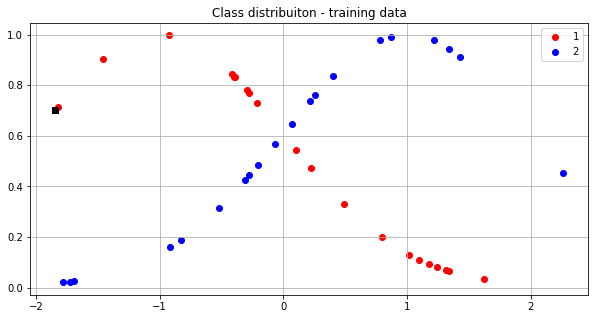

In [17]:
knn(10,X_train, Y_train,[[-1.84241465 , 0.70129179]] )



plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(-1.84241465 , 0.70129179, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

Right!

The prediction found for the point [[1.29844046, 0.07126042]] of k=10 was class [1]
The probability estimates for each class are [[0. 1.]]


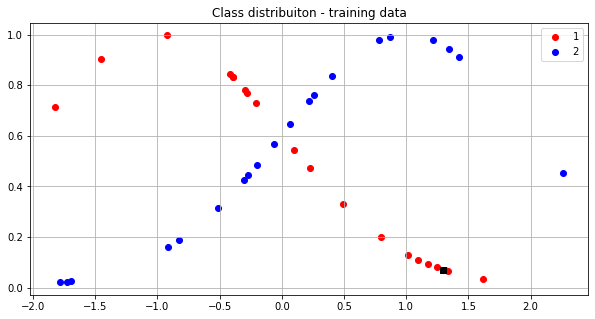

In [18]:
knn(10,X_train, Y_train,[[ 1.29844046 , 0.07126042]] )


plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter( 1.29844046 , 0.07126042, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

The prediction found for the point [[0.08963386, 0.66074767]] of k=10 was class [0]
The probability estimates for each class are [[0.66666667 0.33333333]]


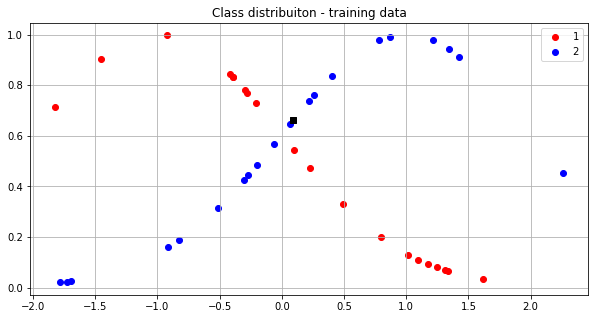

In [19]:
knn(10,X_train, Y_train,[[0.08963386 , 0.66074767]] )

plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(0.08963386 , 0.66074767, color = 'black', marker = 's')
plt.legend(["1" , "2"])
plt.title('Class distribuiton - training data')
plt.grid(True)

The prediction found for the point [[0.90218459, 0.9952275]] of k=10 was class [0]
The probability estimates for each class are [[1. 0.]]


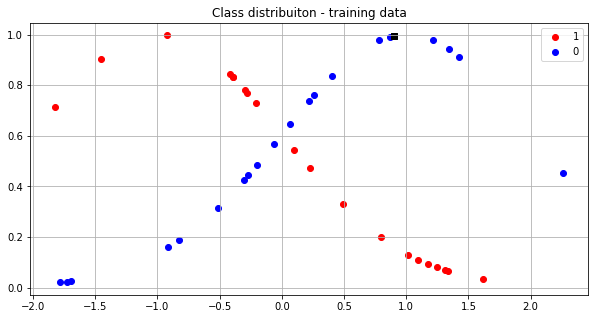

In [20]:
knn(10,X_train, Y_train,[[0.90218459 , 0.9952275 ]] )


plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(treino_1,gauss1(treino_1), color = 'red', label = 'C1')
plt.scatter(treino_2, gauss2(treino_2), color = 'blue', label = 'C2')
plt.scatter(0.90218459 , 0.9952275 , color = 'black', marker = 's')
plt.legend(["1" , "0"])
plt.title('Class distribuiton - training data')
plt.grid(True)

As expected